In [1]:
#############################################################################################################
##### Notebook Processamento de Linguagem natural (PLN)
##### Baseado em:
## Natural Language Processing with Python (book)
##
##############################################################################################################
## Objetivos:
##   Exemplo pratico do uso de NLP para classificao de texto com extracao pobre de caracteristicas
##   Tentem popular com outros tipos de texto, tipo texto de Machado de Assis e Jose de Alencar
##        Verificar se eh possivel a distincao destes dois escritores.


import nltk, random
from os import listdir

todos_tokens = []
docs_label = []

path_in = "C:/Users/dealbuqc/Desktop/UFPB/Classes/SBC/PLN/"

for x in listdir(path_in+'embargados'):
    f = open(path_in+'embargados/'+x, encoding="utf8")
    raw = f.read()
    tokens = nltk.tokenize.word_tokenize(raw)
    docs_label = docs_label + [(list(tokens),'embargado')]
    todos_tokens = tokens + todos_tokens
    f.close()

for x in listdir(path_in+'nembargados'):
    f = open(path_in+'nembargados/'+x, encoding="utf8")
    raw = f.read()
    tokens = nltk.tokenize.word_tokenize(raw)
    docs_label = docs_label + [(list(tokens),'nao-embargado')]
    todos_tokens = tokens + todos_tokens
    f.close()
    
random.shuffle(docs_label)

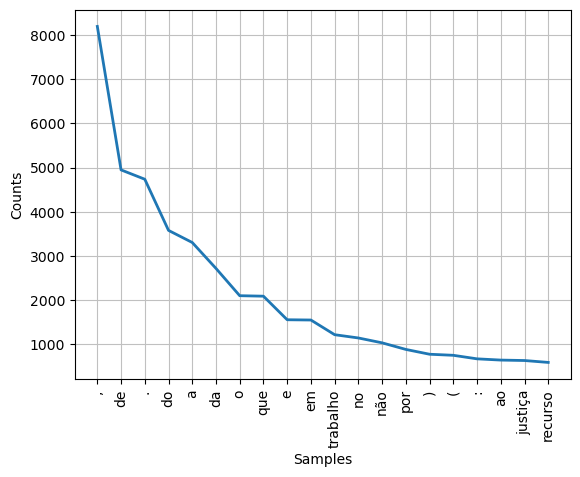

<Axes: xlabel='Samples', ylabel='Counts'>

In [2]:
fd = nltk.FreqDist(w.lower() for w in todos_tokens)
as2000mais = list(fd.most_common(2000))  # [[token1,count1], [token1,count1], ...]
as2000mais = [item[0] for item in as2000mais]   # [token1, token2, ...]
fd.plot(20)


In [4]:
# Implementar o extrator de características
# Como melhorar essa parte????????

def get_doc_features(documento):
    palavras_do_doc = set(documento)
    caracteristicas = {}
    for palavra in as2000mais:
        caracteristicas['contains({})'.format(palavra)] = (palavra in palavras_do_doc)
    return caracteristicas

In [5]:
# Realizar o treinamento

featuresets = [(get_doc_features(d),l) for (d,l) in docs_label]
train_set, test_set = featuresets[14:], featuresets[:14]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [6]:
print(nltk.classify.accuracy(classifier,test_set))

0.5714285714285714


In [ ]:
len(featuresets[0][0])

In [ ]:
train_set[1]